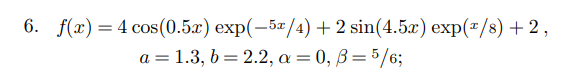

In [88]:
import sympy as sp
import numpy as np
import math as m
a = 1.3
b = 2.2
al = 0
bet = 5/6
bet

0.8333333333333334

проверить степени точности

In [89]:
def F(x):
    return [4*m.cos(i/2)*m.exp(-5*i/4)+2*m.sin(4.5*i)*m.exp(i/8) + 2 for i in x]
def Fnum(x):
    return 4*m.cos(x/2)*m.exp(-5*x/4)+2*m.sin(4.5*x)*m.exp(x/8) + 2


In [90]:
# проверяем, есть ли на главной диагонали нули
def no0(M, k):
    n =  M.shape[0]
    while k < n and not M[k, k]:
        k += 1
    return k

In [91]:
#простой метод Гаусса
def Gauss(A,b):
        M = np.hstack((A, b)) # "склейка" матрицы коэффициентов при переменных и вектора свободных членов
        n = M.shape[0] 
        for k in range(n): 
            # убираем нули с главной диагонали, если они есть
            k0 = no0(M, k)
            if k0 != k:
                M[k0], M[k] = M[k].copy(), M[k0]   
            if M[k, k] != 1:
                M[k, :] *= 1 / M[k, k]
            # приямой ход метода Гаусса
            for r in range(k + 1, n):
                M[r, :] -= M[k, :] * M[r, k]
        #обратный ход метода Гаусса
        for k in range(n - 1, 0, -1):
            for r in range(k - 1, -1, -1):
                if M[r, k]:
                    M[r, :] -= M[k, :] * M[r, k]
        
        return  (M[:,n])


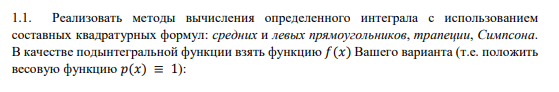

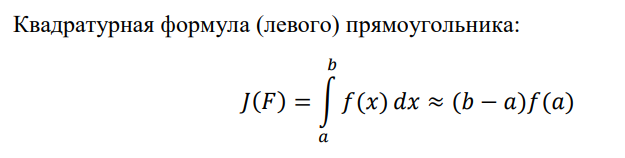

In [92]:
for i in range(0,180,18):
    xi = np.linspace(a,b,i)
    f = F(xi)
    ans = 0
    for j in range(len(xi)-1):
        ans +=(xi[j+1]-xi[j])*f[j]
    print(ans)

0
3.091301949163613
3.0848581170066045
3.082282110678701
3.0809213913391833
3.0800825816208754
3.0795142505245447
3.079103892227037
3.0787937364724733
3.078551099833583


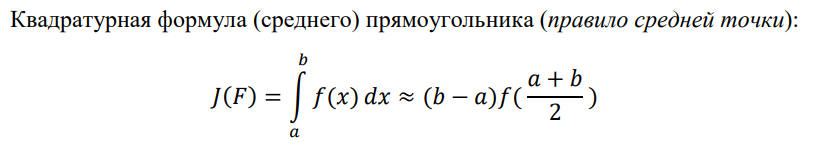

In [93]:
for i in range(0,180,18):
    xi = np.linspace(a,b,i)
    ans = 0
    for j in range(len(xi)-1):
        ans +=(xi[j+1]-xi[j])*Fnum((xi[j]+xi[j+1])/2)
    print(ans)

0
3.078837212532485
3.0771015557870984
3.0767998271597605
3.07669654125461
3.076649284780126
3.0766237975581854
3.076608504268347
3.076598613389485
3.0765918504353764


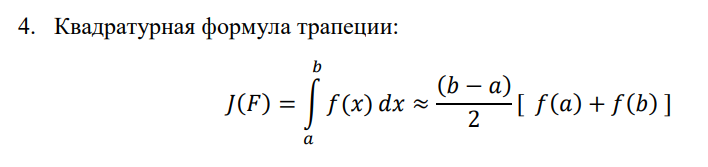

In [94]:
for i in range(0,180,18):
    xi = np.linspace(a,b,i)
    f = F(xi)
    ans = 0
    for j in range(len(xi)-1):
        ans +=(xi[j+1]-xi[j])*(f[j] + f[j+1])/2
    print(ans)

0
3.0720286664851915
3.075496808277085
3.0761001143478865
3.076306661683786
3.076401168075559
3.0764521401924587
3.0764827257827716
3.0765025070631515
3.07651603271847


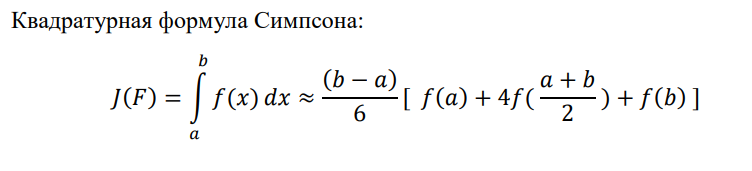

In [95]:
for i in range(0,180,18):
    xi = np.linspace(a,b,i)
    ans = 0
    for j in range(len(xi)-1):
        ans +=(xi[j+1]-xi[j])*(4*Fnum((xi[j]+xi[j+1])/2)+Fnum(xi[j])+Fnum(xi[j+1]))/6
    print(ans)

0
3.0765676971833873
3.0765666399504275
3.0765665895558016
3.0765665813976684
3.076566579211936
3.0765665784362786
3.0765665781064877
3.076566577947374
3.076566577863075


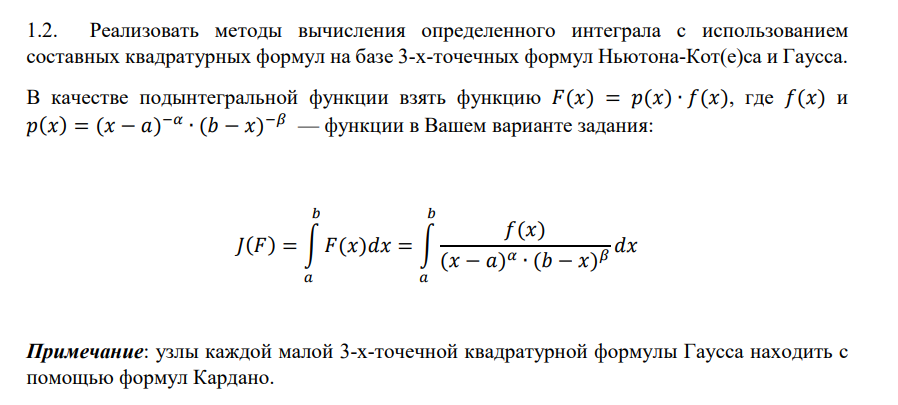

Ньютона — Котса

In [96]:
def F(x):
    return 4*m.cos(x/2)*m.exp(-5*x/4)+2*m.sin(4.5*x)*m.exp(x/8) + 2

In [102]:
def F(x):
    return x*x

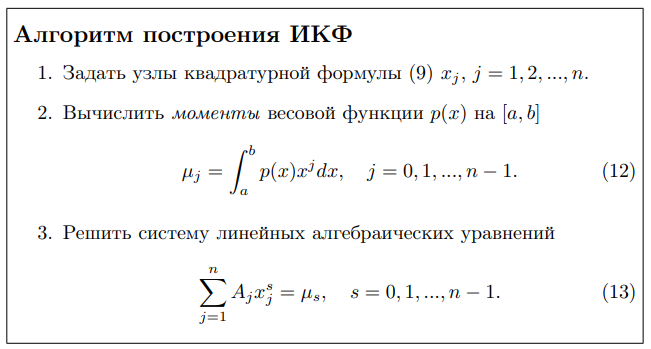


In [103]:
for i in range(1,100,10):
    ans = 0
    xi = np.linspace(a,b,i)
    for j in range(1,len(xi)-1):
        x2 = xi[j]
        x0 = xi[j-1]
        x1 = (x0+x2)/2
        mo0 = ((b-x2)**(-bet+1)-(b-x0)**(-bet+1))/(-bet+1)
        mo1 = ((b-x2)**(-bet+2)-(b-x0)**(-bet+2))/(-bet+2)-b*mo0
        mo2 = ((b-x2)**(-bet+3)-(b-x0)**(-bet+3))/(-bet+3)-2*b*mo1+b**2*mo0
        X = np.array([[1,1,1],[x0,x1,x2],[x0**2,x1**2,x2**2]])
        Ai = np.array([[mo0,mo1,mo2]])
        A = Gauss(X,Ai.T)
        #A = np.linalg.solve(X,Ai.T)
        ans += A[0]*F(x0)+A[1]*F(x1)+A[2]*F(x2)
    print(ans)

0
-24.539379103154374
-30.77821247202155
-34.13557842037244
-36.39121135816322
-38.07083597522387
-39.39905981331958
-40.49183852297392
-41.41653845302153
-42.21561777369152


Гаусс

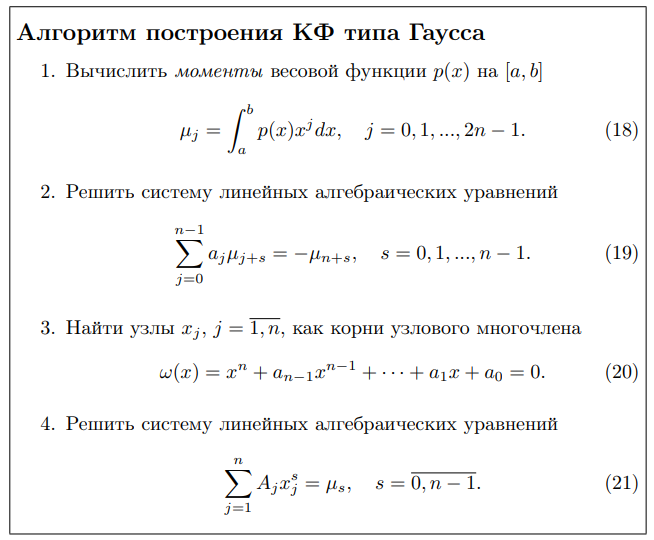

In [104]:
for i in range(0,100,10):
    ans = 0
    xi = np.linspace(a,b,i)
    for j in range(1,len(xi)):
        x2 = xi[j]
        x1 = xi[j-1]
        mo= [0,0,0,0,0,0]
        mo[0] = ((b-x0)**(-bet+1)-(b-x2)**(-bet+1))/(-bet+1)
        mo[1] = ((b-x0)**(-bet+2)-(b-x2)**(-bet+2))/(-bet+2)-b*mo[0]
        mo[2] = ((b-x0)**(-bet+3)-(b-x2)**(-bet+3))/(-bet+3)-2*b*mo[1]+b**2*mo[0]
        mo[3] = ((b-x0)**(-bet+4)-(b-x2)**(-bet+4))/(-bet+4)-3*b*mo[2]+3*b**2*mo[1]-b**3*mo[0]
        mo[4] = ((b-x0)**(-bet+5)-(b-x2)**(-bet+5))/(-bet+5)-4*b*mo[3]+6*b**2*mo[2]-b**3*4*mo[1]+b**4*mo[0]
        mo[5] = ((b-x0)**(-bet+6)-(b-x2)**(-bet+6))/(-bet+6)-5*b*mo[4]+10*b**2*mo[3]-10*b**3*mo[2]+b**4*5*mo[1]-b**5*mo[0]
        X = np.array([[mo[0],mo[1],mo[2]],[mo[1],mo[2],mo[3]],[mo[2],mo[3],mo[4]]])
        Ai = np.array([[-mo[3],-mo[4],-mo[5]]])
        ai = Gauss(X,Ai.T)
        x = np.roots([1,ai[0],ai[1],ai[2]])
        Xd = np.array([[1,1,1],[x[0],x[1],x[2]],[x[0]**2,x[1]**2,x[2]**2]])
        M = np.array([[mo[0],mo[1],mo[2]]])
        A = Gauss(Xd,M.T)
        ans+=A[0]*F(x[0])+A[1]*F(x[1])+A[2]*F(x[2])
    print(ans)

0
-176.2025840328642
-444.7233799297136
-712.0335179302494
-978.9038896800545
-1245.549100845809
-1512.058538881024
-1778.4776822449624
-2044.8327005627314
-2311.1399757652184
